In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## Importamos los datos

datos = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv')

In [3]:
## Veamos un poco los datos

datos.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [4]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

In [5]:
datos.shape

(201, 29)

In [6]:
## Veamos los posibles valores del tipo de tracción

datos['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [7]:
## Creemos un DataFrame con sólo una parte de los datos

datos_parciales = datos[['drive-wheels', 'body-style' , 'price']]

datos_parciales

,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0
...,...,...,...
196,rwd,sedan,16845.0
197,rwd,sedan,19045.0
198,rwd,sedan,21485.0
199,rwd,sedan,22470.0


In [8]:
# Agrupamiento de los resultados

#as_index = False : cambia la apariencia de cómo se ven los datos, por defecto -True- los muestra como lo haría Python
## reset_index(drop = True) : resetea los índices, drop = True nos borra la columna que se agregaría con los índices nuevos y antiguos
grupo1 = datos_parciales.groupby(['drive-wheels'], as_index = False).mean().sort_values(by= 'price' , ascending = False).reset_index(drop = True)
#df_grupo1 = df_group.groupby(['drive-wheels'], as_index = False).mean().sort_values(by = "price", ascending = False).reset_index(drop = True)
grupo1

,drive-wheels,price
0,rwd,19757.613333
1,4wd,10241.000000
2,fwd,9244.779661


In [10]:
## Veamos cómo son los datos estadísticamente agrupados entre drive-wheels y price

datos_parciales.groupby('drive-wheels').price.describe()

,count,mean,std,min,25%,50%,75%,max
drive-wheels,,,,,,,,
4wd,8.0,10241.000000,3288.211064,7603.0,7984.25,9005.5,11367.75,17450.0
fwd,118.0,9244.779661,3345.898257,5118.0,6950.75,8192.0,10332.50,23875.0
rwd,75.0,19757.613333,9082.575728,6785.0,13455.00,16900.0,22547.50,45400.0


In [15]:
## Hagamos otro grupo de prueba

datos_prueba = datos_parciales.groupby(['drive-wheels', 'body-style'], as_index = False).mean().sort_values(by = 'price' , ascending = False).reset_index(drop = True)

datos_prueba

,drive-wheels,body-style,price
0,rwd,hardtop,24202.714286
1,rwd,convertible,23949.600000
2,rwd,sedan,21711.833333
3,rwd,wagon,16994.222222
4,rwd,hatchback,14337.777778
5,4wd,sedan,12647.333333
6,fwd,convertible,11595.000000
7,fwd,wagon,9997.333333
8,fwd,sedan,9811.800000
9,4wd,wagon,9095.750000


In [20]:
datos_prueba.pivot(index = 'drive-wheels' , columns= 'body-style')

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [24]:
## Como vemos, tenemos valores nulos los cuales podemos llenar con un valor diferente

datos_pivot = datos_prueba.pivot(index = 'drive-wheels' , columns= 'body-style').fillna(0)
datos_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [25]:
## El uso de heatmaps nos permite visualizar el comportamiento del precio en función de dos variables. 
## Por ejemplo, pordemos visualizar la tabla pivote anterior como una imagen de píxeles con el color 
## correspondiente al valor del precio. De esta forma, podemos ver, por ejemplo, como se relaciona el precio 
## con el tipo de tracción y el tipo de carro:

#labels
row_labels = datos_pivot.columns.levels[1]
col_labels = datos_pivot.index

row_labels,col_labels

(Index(['convertible', 'hardtop', 'hatchback', 'sedan', 'wagon'], dtype='object', name='body-style'),
 Index(['4wd', 'fwd', 'rwd'], dtype='object', name='drive-wheels'))

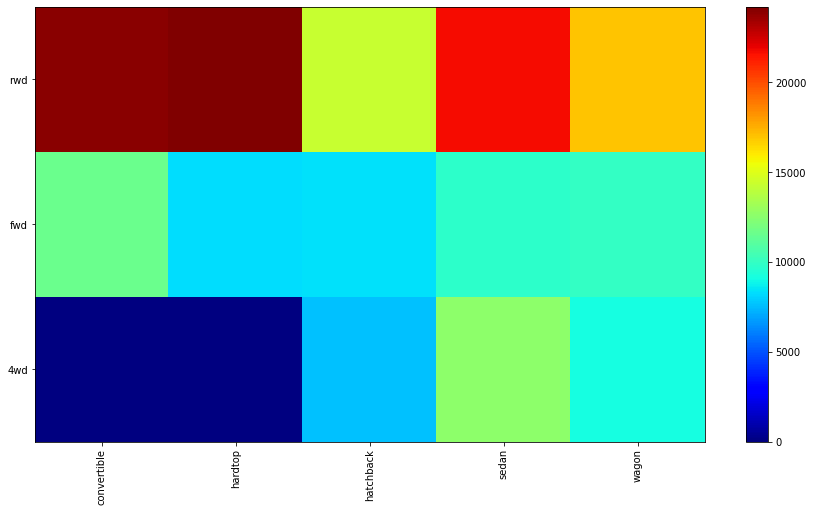

In [27]:
fig, ax = plt.subplots(figsize=(15,8))
im = ax.pcolor(datos_pivot, cmap='jet')

#move ticks to the center
ax.set_xticks(np.arange(datos_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(datos_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate the labels
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

<AxesSubplot:xlabel='body-style', ylabel='drive-wheels-engine-location'>

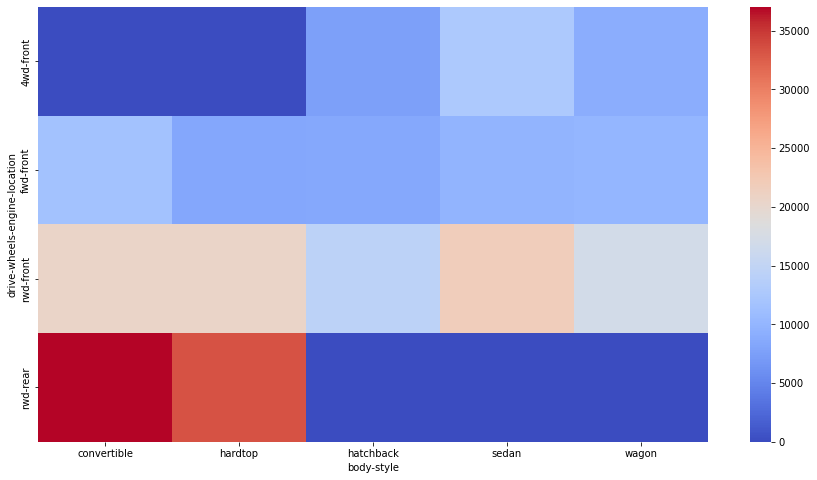

In [28]:
## Inténtemoslo con Seaborn

datos_pivot2= datos.pivot_table('price',index=['drive-wheels','engine-location'],columns=['body-style']).fillna(0)

fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(datos_pivot2,ax=ax,cmap='coolwarm')